In [4]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)

[&larr; Back to Index](index.html)

# Short-Time Fourier Transform

Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a single Fourier transform over an entire 10-minute song.

The **short-time Fourier transform (STFT)** ([Wikipedia](https://en.wikipedia.org/wiki/Short-time_Fourier_transform); FMP, p. 53) is obtained by computing the Fourier transform for successive frames in a signal. 

$$ X(m, \omega) = \sum_n x(n) w(n-m) e^{-j \omega n} $$

As we increase $m$, we slide the window function $w$ to the right. For the resulting frame, $x(n) w(n-m)$, we compute the Fourier transform. Therefore, the STFT $X$ is a function of both time, $m$, and frequency, $\omega$.

Let's load a file:

In [20]:
x, sr = librosa.load('audio/simple_piano.wav')
ipd.Audio(x, rate=sr)

[`librosa.stft`](https://librosa.github.io/librosa/generated/librosa.core.stft.html#librosa.core.stft) computes a STFT. We provide it a frame size, i.e. the size of the FFT, and a hop length, i.e. the frame increment:

In [21]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

To convert the hop length and frame size to units of seconds:

In [22]:
float(hop_length)/sr # units of seconds

0.023219954648526078

In [23]:
float(n_fft)/sr  # units of seconds

0.09287981859410431

For real-valued signals, the Fourier transform is symmetric about the midpoint. Therefore, `librosa.stft` only retains one half of the output:

In [24]:
X.shape

(1025, 166)

This STFT has 1025 frequency bins and 166 frames in time.

## Spectrogram

In music processing, we often only care about the spectral magnitude and not the phase content.

The **spectrogram** ([Wikipedia](https://en.wikipedia.org/wiki/Spectrogram); FMP, p. 29, 55) shows the the intensity of frequencies over time. A spectrogram is simply the squared magnitude of the STFT:

$$ S(m, \omega) = \left| X(m, \omega) \right|^2 $$

The human perception of sound intensity is logarithmic in nature. Therefore, we are often interested in the log amplitude:

In [25]:
S = abs(X)**2

To display any type of spectrogram in librosa, use [`librosa.display.specshow`](http://bmcfee.github.io/librosa/generated/librosa.display.specshow.html).

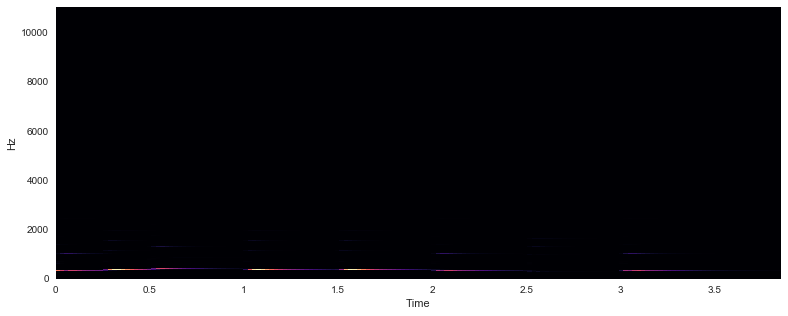

In [26]:
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')

## Mel-spectrogram

`librosa` has some outstanding spectral representations, including [`librosa.feature.melspectrogram`](http://bmcfee.github.io/librosa/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram):

In [3]:
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=4096, hop_length=256)

The human perception of sound intensity is logarithmic in nature. Therefore, we are often interested in the log amplitude:

In [4]:
logS = librosa.logamplitude(S)

To display any type of spectrogram in librosa, use [`librosa.display.specshow`](http://bmcfee.github.io/librosa/generated/librosa.display.specshow.html).

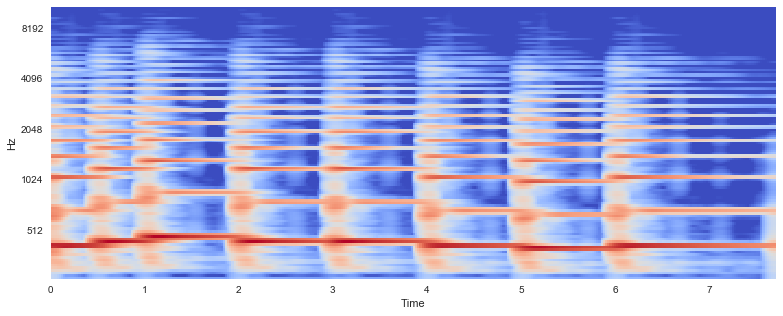

In [5]:
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')

Using `y_axis=mel` plots the y-axis on the [mel scale](https://en.wikipedia.org/wiki/Mel_scale) which is similar to the $\log (1 + f)$ function:

$$ m = 2595 \log_{10} \left(1 + \frac{f}{700} \right) $$

## `librosa.cqt`

Unlike the Fourier transform, but similar to the mel scale, the [constant-Q transform](http://en.wikipedia.org/wiki/Constant_Q_transform) uses a logarithmically spaced frequency axis.

To plot a constant-Q spectrogram, will use [`librosa.cqt`](http://bmcfee.github.io/librosa/generated/librosa.core.cqt.html#librosa.core.cqt):

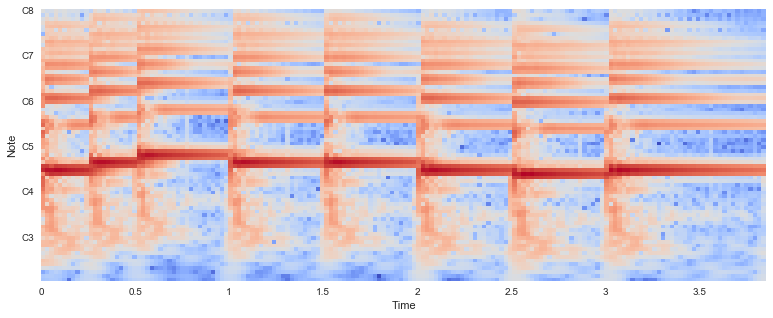

In [6]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.logamplitude(C)
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

[&larr; Back to Index](index.html)